In [1]:
## Import all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation, Birch, DBSCAN, KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score


In [2]:
## Load the data
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
## First of all drop the customerID this is not necessary
df = df.drop(['CustomerID'], axis = 1)

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### There are no null values

## Check Distribution of all columns

Text(0.5, 1.0, 'Gender Distribution')

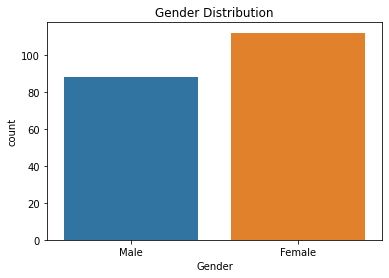

In [8]:
sns.countplot(x = 'Gender', data = df)
plt.title("Gender Distribution")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

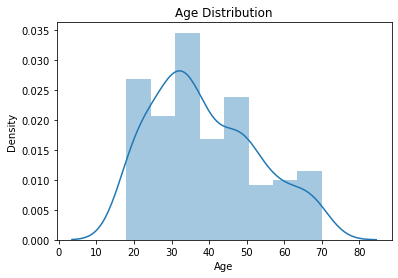

In [9]:
sns.distplot(df['Age'])
plt.title("Age Distribution")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Customer Age Distribution')

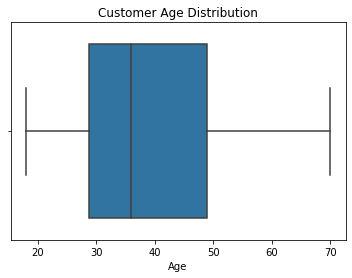

In [10]:
sns.boxplot('Age', data = df)
plt.title("Customer Age Distribution")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Annual Income Distribution')

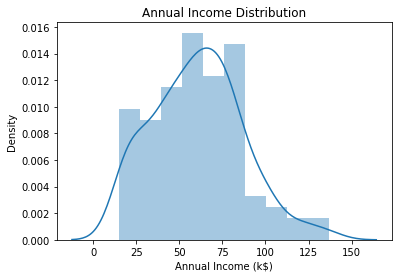

In [11]:
sns.distplot(df['Annual Income (k$)'])
plt.title("Annual Income Distribution")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Annual Income Distribution')

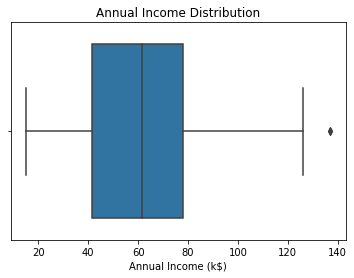

In [12]:
sns.boxplot('Annual Income (k$)', data = df)
plt.title("Annual Income Distribution")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Spending Score Distribution')

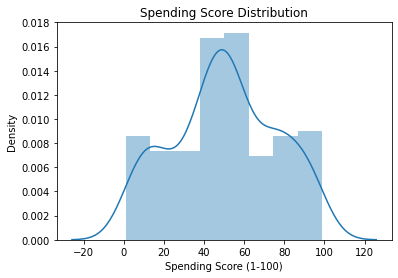

In [13]:
sns.distplot(df['Spending Score (1-100)'])
plt.title("Spending Score Distribution")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Spending Score Distribution')

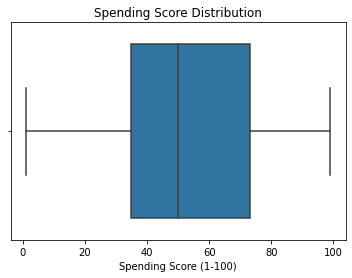

In [14]:
sns.boxplot('Spending Score (1-100)', data = df)
plt.title("Spending Score Distribution")

In [15]:
pd.get_dummies(df["Gender"], drop_first=True).head()

,Male
0,1
1,1
2,0
3,0
4,0


<AxesSubplot:>

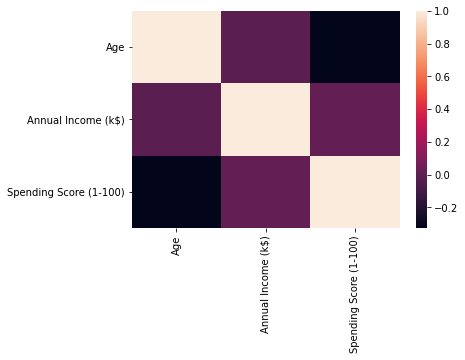

In [16]:
sns.heatmap(df.corr())

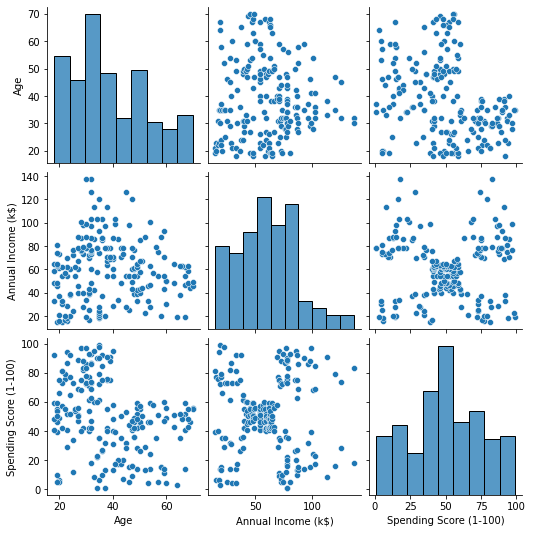

In [17]:
sns.pairplot(df)

#### For finding the value of K

In [18]:
X = df.iloc[:, [2, 3]].values

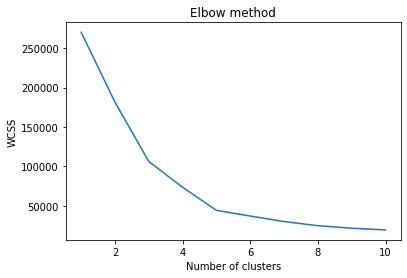

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

### Now Applying/training the model

#### Kmeans Algorithm

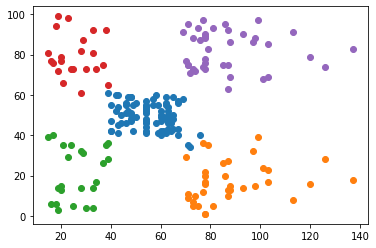

In [20]:
# define the model
model = KMeans(n_clusters = 5, init='k-means++', random_state=42)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for sample from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    #create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

##### It gives good result lets check another algorithms

## DBSCAN Algortihm

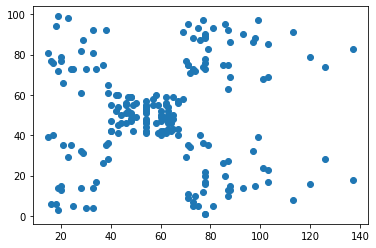

In [21]:
# define the model
model = DBSCAN(eps=0.30, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

#### this one is not give good result

## Birch Algotithm

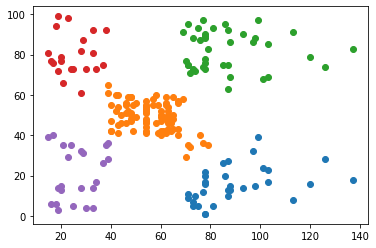

In [22]:
# define the model
model = Birch(threshold=0.01, n_clusters=5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

#### Birch Alogorithm also give a good result

## Affinity Propagation Algorithm

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


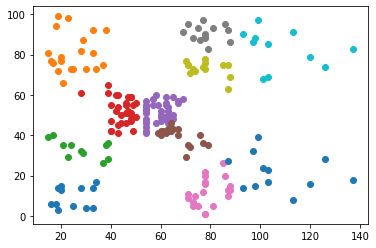

In [23]:
# define the model
model = AffinityPropagation(damping=0.5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

#### In this case, I could not achieve the good result

## Spectral Clustering Algorithm

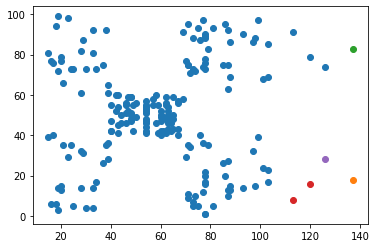

In [24]:
# define the model
model = SpectralClustering(n_clusters=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

##### We dont get a good result also in this Algorithm

#### The Algorithms which gives good results on this dataset are KMeans and Birch algorithms